In [71]:
import pyodbc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from requests.auth import HTTPBasicAuth
import requests
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split


In [72]:
oxygendataframe = pd.read_csv('https://raw.githubusercontent.com/DEVAGOPIKRISHNAPRASAD/IotWithDataScience/main/iotwithdatascienceoxygeninfo_mercyhospitalhistory_traindata.csv')
print('Dimension of dataset= ', oxygendataframe.shape)
oxygendataframe.head()

Dimension of dataset=  (11866, 4)


,Type Of Operation,Duration of the Operation,Age,Quantity of Oxygen Consumed
0,1,3.54,20,53.10
1,2,5.45,21,81.75
2,1,6.32,22,94.80
3,2,2.28,23,34.20
4,3,1.30,24,19.50


In [73]:
Features = oxygendataframe.values[:, 0:3]  
output = oxygendataframe.values[:, 3] 

for i in range(5):
    print('Features =', Features[i, ], ', output =', output[i])

Features = [ 1.    3.54 20.  ] , output = 53.1
Features = [ 2.    5.45 21.  ] , output = 81.75
Features = [ 1.    6.32 22.  ] , output = 94.8
Features = [ 2.    2.28 23.  ] , output = 34.2
Features = [ 3.   1.3 24. ] , output = 19.5


Ordinary Liner Regression Model, Ridge , Lasso and MLP_Relu Models

In [74]:
# Ordinary Liner Regression Model
ordinaryleastsquaresLinearRegressionModel = make_pipeline(StandardScaler(with_mean=True, with_std=True), LinearRegression())
ordinaryleastsquaresLinearRegressionModel.fit(Features ,output)

# Ridge
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('model', Ridge(alpha=0.01,max_iter=10000))
]

ridge_model = Pipeline(steps)
ridge_model.fit(Features ,output)

# Lasso
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('model', Lasso(alpha=0.01,max_iter=10000))
]

lasso_model = Pipeline(steps)
lasso_model.fit(Features ,output)


# MLP_Relu
MLP_Relu = MLPRegressor(random_state=1, max_iter=100000, alpha=0.1, activation="relu").fit(Features, output)


In [75]:
oxygentestdataframe = pd.read_csv('https://raw.githubusercontent.com/DEVAGOPIKRISHNAPRASAD/IotWithDataScience/main/iotwithdatascienceoxygeninfo_testdata.csv')
TestFeatures = oxygendataframe.values[:, 0:3]  
target = oxygendataframe.values[:, 3] 

predictedOxygenQuantity_ordinary = pd.DataFrame(ordinaryleastsquaresLinearRegressionModel.predict(TestFeatures), columns=['Predicted Oxygen Quantity using ordinary LinerRegression']) 
predictedOxygenQuantity_ridge = pd.DataFrame(ridge_model.predict(TestFeatures), columns=['Predicted Oxygen Quantity using Ridge']) 
predictedOxygenQuantity_lasso = pd.DataFrame(lasso_model.predict(TestFeatures), columns=['Predicted Oxygen Quantity using Lasso']) 
predictedOxygenQuantity_mlp = pd.DataFrame(MLP_Relu.predict(TestFeatures), columns=['Predicted Oxygen Quantity using MLP']) 


actualOxygenQuantity = pd.DataFrame(target, columns=['Actual Oxygen Quantity using ordinary LinerRegression'])
actualOxygenQuantity = actualOxygenQuantity.reset_index(drop=True) 


df_actual_vs_predicted = pd.concat([actualOxygenQuantity,predictedOxygenQuantity_ordinary,predictedOxygenQuantity_ridge,predictedOxygenQuantity_lasso,predictedOxygenQuantity_mlp],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,11856,11857,11858,11859,11860,11861,11862,11863,11864,11865
Actual Oxygen Quantity using ordinary LinerRegression,53.100000,81.750000,94.800000,34.200000,19.500000,66.000000,139.500000,151.200000,34.200000,66.000000,...,151.200000,34.200000,66.000000,128.250000,139.500000,53.100000,81.750000,94.800000,34.200000,19.500000
Predicted Oxygen Quantity using ordinary LinerRegression,54.105510,81.800494,94.461017,35.776983,21.516444,66.487232,137.589487,148.943436,35.769250,66.481045,...,148.846005,35.749762,66.525278,126.739421,137.625986,54.003743,81.794308,94.391111,35.707077,21.510258
Predicted Oxygen Quantity using Ridge,54.424100,81.268532,94.146626,36.070498,21.439318,65.908609,138.426605,150.841551,36.272345,65.973561,...,151.719817,35.765237,66.114046,126.368093,138.218014,53.753943,81.288509,93.293334,35.817122,21.648508
Predicted Oxygen Quantity using Lasso,54.433575,81.292867,94.156961,36.032654,21.334194,65.983957,138.299234,150.745528,36.232683,66.065516,...,151.615170,35.715449,66.155615,126.343523,138.150449,53.792842,81.301941,93.347779,35.794080,21.560194
Predicted Oxygen Quantity using MLP,54.331856,81.921578,94.641722,35.914623,21.579031,66.432118,137.191243,148.632307,35.865437,66.392770,...,148.192633,35.835268,66.580332,126.321825,137.053594,53.965910,81.882230,94.384642,35.657543,21.539683


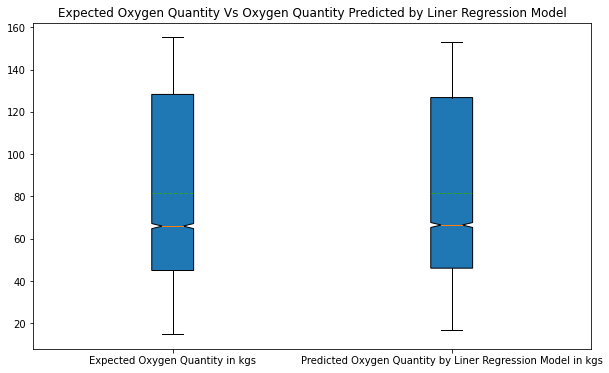

In [80]:

# plt.bar(target, ordinaryleastsquaresLinearRegressionModel.predict(TestFeatures))
# plt.xlabel('Actual Oxygen Quantity')
# plt.ylabel('Oxygen Quantity Predicted By Liner Regression Model')
# plt.rcParams["figure.figsize"] = (10,6) 
# plt.title("Actual Oxygen Quantity Vs Oxygen Quantity Predicted By Ordinary Leastsquares LinearRegression Model")

fig, ax = plt.subplots()
columns = [target, ordinaryleastsquaresLinearRegressionModel.predict(TestFeatures)]
ax.boxplot(columns, notch=True, patch_artist=True,showmeans=True,meanline=True)
plt.title("Expected Oxygen Quantity Vs Oxygen Quantity Predicted by Liner Regression Model")
plt.xticks([1, 2], ["Expected Oxygen Quantity in kgs", "Predicted Oxygen Quantity by Liner Regression Model in kgs"])
plt.show()

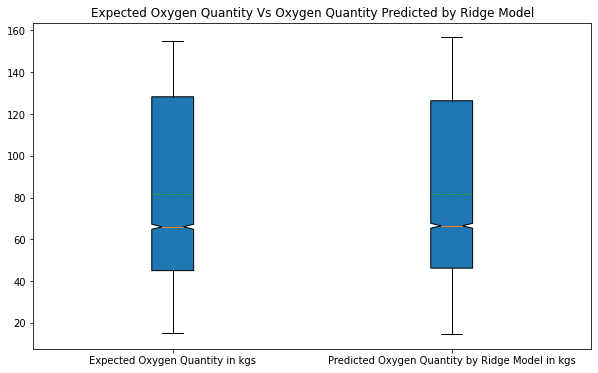

In [82]:
# plt.bar(target, ridge_model.predict(TestFeatures))
# plt.xlabel('Actual Oxygen Quantity')
# plt.ylabel('Oxygen Quantity Predicted By Ridge Model')
# plt.rcParams["figure.figsize"] = (10,6) 
# plt.title("Actual Oxygen Quantity Vs Oxygen Quantity Predicted By Ridge Models")


fig, ax = plt.subplots()
columns = [target, ridge_model.predict(TestFeatures)]
ax.boxplot(columns, notch=True, patch_artist=True,showmeans=True,meanline=True)
plt.title("Expected Oxygen Quantity Vs Oxygen Quantity Predicted by Ridge Model")
plt.xticks([1, 2], ["Expected Oxygen Quantity in kgs", "Predicted Oxygen Quantity by Ridge Model in kgs"])
plt.show()

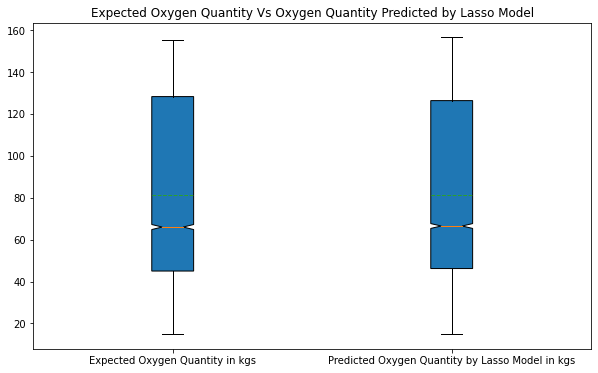

In [83]:
# plt.boxplot(lasso_model.predict(TestFeatures))
# plt.xlabel('Actual Oxygen Quantity')
# plt.ylabel('Oxygen Quantity Predicted By Lasso Model')

# plt.rcParams["figure.figsize"] = (10,6) 
# plt.title("Actual Oxygen Quantity Vs Oxygen Quantity Predicted By Lasso Models")

fig, ax = plt.subplots()
columns = [target, lasso_model.predict(TestFeatures)]
ax.boxplot(columns, notch=True, patch_artist=True,showmeans=True,meanline=True)
plt.title("Expected Oxygen Quantity Vs Oxygen Quantity Predicted by Lasso Model")
plt.xticks([1, 2], ["Expected Oxygen Quantity in kgs", "Predicted Oxygen Quantity by Lasso Model in kgs"])
plt.show()




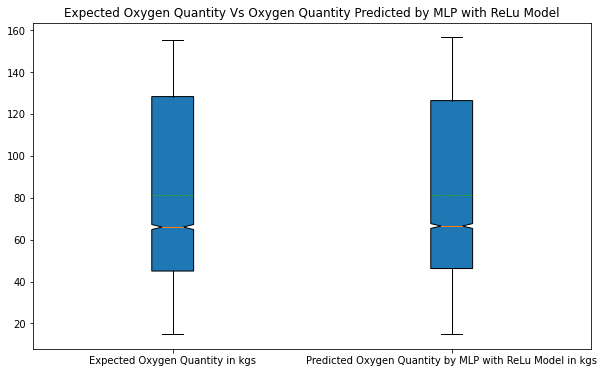

In [84]:
# plt.bar(target, MLP_Relu.predict(TestFeatures))
# plt.xlabel('Actual Oxygen Quantity')
# plt.ylabel('Oxygen Quantity Predicted By MLP with ReLu Model')
# plt.rcParams["figure.figsize"] = (10,6) 
# plt.title("Actual Oxygen Quantity Vs Oxygen Quantity Predicted By MLP ReLu Models")

fig, ax = plt.subplots()
columns = [target, lasso_model.predict(TestFeatures)]
ax.boxplot(columns, notch=True, patch_artist=True,showmeans=True,meanline=True)
plt.title("Expected Oxygen Quantity Vs Oxygen Quantity Predicted by MLP with ReLu Model")
plt.xticks([1, 2], ["Expected Oxygen Quantity in kgs", "Predicted Oxygen Quantity by MLP with ReLu Model in kgs"])
plt.show()

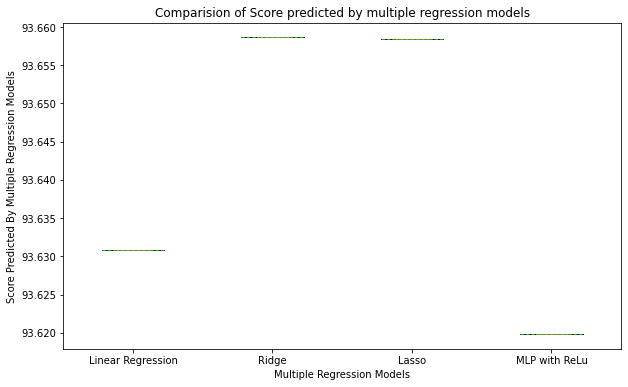

In [79]:
model=[]
accuracy=[]

ordinaryleastsquaresLinearRegressionModel_score = ordinaryleastsquaresLinearRegressionModel.score(TestFeatures, target)
ridge_score = ridge_model.score(TestFeatures, target)
lasso_score = lasso_model.score(TestFeatures, target)
mlprelu_score = MLP_Relu.score(TestFeatures, target)

model.append('Linear Regression')
model.append('Ridge')
model.append('Lasso')
model.append('MLP')


accuracy.append(ordinaryleastsquaresLinearRegressionModel_score*100)
accuracy.append(ridge_score*100)
accuracy.append(lasso_score*100)
accuracy.append(mlprelu_score*100)
# print(accuracy)

# plt.boxplot (accuracy)
# plt.xlabel('Multiple Regression Models')
# plt.ylabel('Score Predicted By Multiple Regression Models')
# plt.rcParams["figure.figsize"] = (10,6) 
# plt.title("Comparision of Score predicted by multiple regression models")

# value1 = [84]
# value2=[62]
# value3=[23]
# value4=[59]
 
box_plot_data=[[ordinaryleastsquaresLinearRegressionModel_score*100],[ridge_score*100],[lasso_score*100],[mlprelu_score*100]]
plt.xlabel('Multiple Regression Models')
plt.ylabel('Score Predicted By Multiple Regression Models')
plt.boxplot(box_plot_data,notch=True,patch_artist=True,labels=['Linear Regression','Ridge','Lasso','MLP with ReLu'],meanline=True,showmeans=True)
plt.title("Comparision of Score predicted by multiple regression models")
plt.show()



# fig = plt.figure(figsize=(10,10))
# fig.suptitle('Multiple Regression Models')
# ax = fig.add_subplot(111)
# plt.boxplot(accuracy)
# ax.set_xticklabels(model)
# plt.show()


# plt.xlabel('Multiple Regression Models')
# plt.ylabel('Score Predicted By Multiple Regression Models')
# plt.rcParams["figure.figsize"] = (10,6) 
# plt.plot(model,accuracy)


# print('Accuracy with Ordinary Liner Model',ordinaryleastsquaresLinearRegressionModel_acuracy*100,'%')
# print('Accuracy with Ridge',ridge_acuracy*100,'%')
# print('Accuracy with Lasso',lasso_acuracy*100,'%')
# print('Accuracy with MLP',mlprelu_acuracy*100,'%')

                                    Forecasting Oxygen quantity for next week

In [69]:
# server = 'iotwithdatascienceserver.database.windows.net'
# database = 'medicalstorage'
# username = 'iotazureuser'
# password = 'azureuser@A11' 
# driver= '{ODBC Driver 17 for SQL Server}'
# predictionofOxygenStartDate= ''
# with pyodbc.connect('DRIVER='+driver+';SERVER=tcp:'+server+';PORT=1433;DATABASE='+database+';UID='+username+';PWD='+ password) as conn:
#     with conn.cursor() as cursor:
#         cursor.execute("SELECT TypeofOperation,duration,age from OperationsInfo where ScheduledDate > '12/17/2021' and ScheduledDate < '12/23/2021' ")
#         result = cursor.fetchall()
#         final_result = [list(i) for i in result]

# with pyodbc.connect('DRIVER='+driver+';SERVER=tcp:'+server+';PORT=1433;DATABASE='+database+';UID='+username+';PWD='+ password) as conn:
#     with conn.cursor() as cursor:
#         cursor.execute("SELECT top 1 LOADCELL from MedStorage where LOADCELL <> '------' order by 1 desc")
#         result = cursor.fetchall()
#         currentOxygenQuantity = int([list(i) for i in result][0][0])

          
# predictedOxygenQuantity = 0
# for i in range(len(final_result)):
#     predictedOxygenQuantity += ridge_model.predict([final_result[i]])

# print('Predicted oxygen quantity for next week is:', predictedOxygenQuantity) 

# quantityofOxygenRequired = predictedOxygenQuantity-currentOxygenQuantity
# url = "https://rest.nexmo.com/sms/json?from=18664797424&to=15734667123&api_key=cf15a5ea&api_secret=ZJ8wPv8RwYMDKVL1&text= Estimated Oxygen quantity  for next week is:"+ str(quantityofOxygenRequired)+ " in litres "

url = "https://rest.nexmo.com/sms/json?from=18664797424&to=15734667123&api_key=cf15a5ea&api_secret=ZJ8wPv8RwYMDKVL1&text= Estimated Oxygen Cylinder capacity for next week is 342 kgs"
req = requests.get(url)
print(req)


 


<Response [200]>
